# Creating Data

In [1]:
import os #It is a Python library that provides a way of interacting with the operating system
import time #library that provides various time-related functions
import uuid #universally unique identifiers for generating unique file names
import cv2 #Computer Vision Library for reading, writing and manupulating images.
import matplotlib.pyplot as plt #for plotting images

In [10]:
uuid.uuid1() #unnique file name for example - everytime it ll give unique name

UUID('14372a9a-6385-11ee-b4f0-145afc8ba2e8')

In [11]:
IMAGES_PATH=os.path.join("E:\Jupyter\Data\images") #module used to join one or more path
number_images=30

In [12]:
IMAGES_PATH

'E:\\Jupyter\\Data\\images'

In [ ]:
# Open a video capture object for the second camera (assuming it's available)
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    for imgnum in range(number_images):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()  # Capture a frame from the camera

        if ret:
            # Generate a unique image name using UUID
            imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')

            # Save the frame as an image
            cv2.imwrite(imgname, frame)

            # Display the image (optional)
            cv2.imshow('Captured Image', frame)

            # Wait for a short duration
            time.sleep(0.5)

        # Check for the 'q' key to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [2]:
import tensorflow as tf
import json #(JavaScript Object Notation) used for data communication between a server and a web application.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
images=tf.data.Dataset.list_files("E:\Jupyter\Data\images\*.jpg")

In [ ]:
images.as_numpy_iterator().next()

b'E:\\Jupyter\\Data\\images\\f76bf3fb-6280-11ee-af59-145afc8ba2e8.jpg'

In [ ]:
def load_image(x):
  byte_img=tf.io.read_file(x)
  img=tf.io.decode_jpeg(byte_img)
  return img

In [ ]:
images=images.map(load_image)

In [ ]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
images.as_numpy_iterator().next()

array([[[ 76,  86,  77],
        [ 77,  87,  78],
        [ 79,  86,  79],
        ...,
        [ 88,  91,  80],
        [ 95,  97,  84],
        [ 96,  98,  85]],

       [[ 81,  88,  80],
        [ 77,  84,  76],
        [ 75,  82,  75],
        ...,
        [ 90,  93,  82],
        [ 95,  97,  84],
        [ 96,  98,  85]],

       [[ 83,  88,  81],
        [ 79,  84,  77],
        [ 79,  84,  78],
        ...,
        [ 92,  95,  84],
        [ 94,  96,  83],
        [ 95,  97,  84]],

       ...,

       [[ 43,  34,  27],
        [ 44,  35,  28],
        [ 44,  35,  28],
        ...,
        [111, 120, 125],
        [114, 123, 128],
        [113, 122, 127]],

       [[ 42,  33,  26],
        [ 43,  34,  27],
        [ 43,  34,  27],
        ...,
        [110, 119, 124],
        [112, 121, 126],
        [108, 119, 123]],

       [[ 39,  30,  23],
        [ 43,  34,  27],
        [ 44,  35,  28],
        ...,
        [110, 119, 124],
        [111, 122, 126],
        [108, 119, 123]]

In [ ]:
image_generator=images.batch(4).as_numpy_iterator()

In [ ]:
plot_images=image_generator.next()

In [ ]:
type(plot_images)

numpy.ndarray

In [ ]:
plot_images.shape

(4, 480, 640, 3)

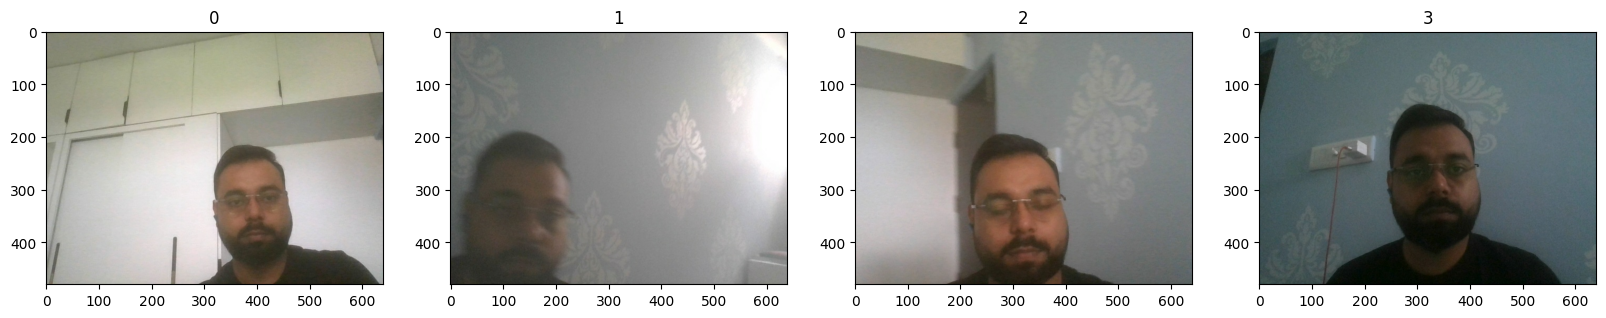

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
    ax[idx].set_title(idx)
plt.show()

# Labelling the Pic from LabelMe

Split data for trainng


In [6]:
60*.7 #training

42.0

In [7]:
60*.15 #valdidation

9.0

In [9]:
60*.15 #Testing

9.0

In [4]:
for folder in ['Train','Test','Val']:
    for file in os.listdir(os.path.join("E:\Jupyter\Data",folder,"E:\Jupyter\Data\Train\images")):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join("E:\Jupyter\Data","E:\Jupyter\Data\Labels",filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join("E:\Jupyter\Data","E:\Jupyter\Data\Labels",filename)
            os.replace(existing_filepath,new_filepath)


In [5]:
#pip install albumentations
import albumentations as alb
import cv2